## GOAL

**Your goal is to predict the operating condition of a waterpoint for each record in the dataset.The labels are simple. There are three possible values:**
- **functional** - the waterpoint is operational and there are no repairs needed
- **functional needs repair** - the waterpoint is operational, but needs repairs
- **non functional** - the waterpoint is not operational 

**These are all the other variables**

**WATER RELATED**
- **payment**: What the water costs
- **payment_type**: What the water costs
- **water_quality**: The quality of the water
- **quality_group**: The quality of the water
- **quantity**: The quantity of water
- **quantity_group**: The quantity of water
- **source**: The source of the water
- **source_type**: The source of the water
- **source_class**: The source of the water

**WELL/WATERPOINT INFORMATION**
- **amount_tsh**: Total static head (amount water available to waterpoint)
- **waterpoint_type**: The kind of waterpoint
- **waterpoint_type_group**: The kind of waterpoint
- **population**: Population around the well
- **funder**: Who funded the well
- **installer**: Organization that installed the well
- **wpt_name**: Name of the waterpoint if there is one
- **scheme_management**: Who operates the waterpoint
- **scheme_name**: Who operates the waterpoint
- **permit**: If the waterpoint is permitted
- **construction_year**: Year the waterpoint was constructed
- **extraction_type**: The kind of extraction the waterpoint uses
- **extraction_type_group**: The kind of extraction the waterpoint uses
- **extraction_type_class**: The kind of extraction the waterpoint uses
- **management**: How the waterpoint is managed
- **management_group**: How the waterpoint is managed

**GEOGRAPHIC INFORMATION**
- **gps_height**: Altitude of the well
- **longitude**: GPS coordinate
- **latitude**: GPS coordinate
- **basin**: Geographic water basin
- **subvillage**: Geographic location
- **region**: Geographic location
- **region_code**: Geographic location (coded)
- **lga**: Geographic location
- **ward**: Geographic location

**OTHERS**
- **date_recorded**: The date the row was entered
- **num_private**: -
- **public_meeting**: True/False
- **recorded_by**: Group entering this row of data

## INCLUDES


In [373]:
# Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as cat_enc

from fastai.imports import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Configuring the visualizations
%matplotlib inline

In [321]:
# Setting a relative path
os.getcwd()

# Importing datasets
data = pd.read_csv("data/training.csv",parse_dates=["date_recorded"])
data_labels = pd.read_csv("data/training_labels.csv")
data = data.merge(data_labels, on="id", how="left")
validation = pd.read_csv("data/validation.csv",parse_dates=["date_recorded"])

## EXPLORATORY DATA ANALYSIS (EDA) + Baseline Model

### Let's take a quick look
- We have many variables and many of them are categorical.

In [303]:
# Function for displaying all the columns
def display_all(data):
    with pd.option_context("display.max_rows",1000, "display.max_columns",1000):
        display(data)

In [304]:
display_all(data.tail().transpose())

,59395,59396,59397,59398,59399
id,60739,27263,37057,31282,26348
amount_tsh,10,4700,0,0,0
date_recorded,2013-05-03 00:00:00,2011-05-07 00:00:00,2011-04-11 00:00:00,2011-03-08 00:00:00,2011-03-23 00:00:00
funder,Germany Republi,Cefa-njombe,NaN,Malec,World Bank
gps_height,1210,1212,0,0,191
installer,CES,Cefa,NaN,Musa,World
longitude,37.1698,35.25,34.0171,35.8613,38.104
latitude,-3.25385,-9.07063,-8.75043,-6.37857,-6.74746
wpt_name,Area Three Namba 27,Kwa Yahona Kuvala,Mashine,Mshoro,Kwa Mzee Lugawa
num_private,0,0,0,0,0


In [121]:
data.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


### Initial pre-processing
- We extract particular data fields from the date variable
- Change string variables to categorical variables
- For categorical variables, those values that are strange (less than 30 ocurrences) are converted into "Others"


In [322]:
# Let's extract particular data fields from the date variable
add_datepart(data, 'date_recorded')
data.dtypes

id                                 int64
amount_tsh                       float64
funder                            object
gps_height                         int64
installer                         object
longitude                        float64
latitude                         float64
wpt_name                          object
num_private                        int64
basin                             object
subvillage                        object
region                            object
region_code                        int64
district_code                      int64
lga                               object
ward                              object
population                         int64
public_meeting                    object
recorded_by                       object
scheme_management                 object
scheme_name                       object
permit                            object
construction_year                  int64
extraction_type                   object
extraction_type_

In [323]:
# List variables with type = object
categorical_names = list(data.select_dtypes(include=['object']).columns)
categorical_names

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [324]:
# Replace values with less than 30 ocurrences
for category in categorical_names:
    
    levels_count = data[category].value_counts()
    level_less30= levels_count[levels_count<30]
    rows = data[category].isin(list(level_less30.keys())) 
    data.loc[rows,category] = 'Others'    

In [325]:
# Transform objects into categorical variables
data[categorical_names] = data[categorical_names].astype("category")
data.dtypes

id                                  int64
amount_tsh                        float64
funder                           category
gps_height                          int64
installer                        category
longitude                         float64
latitude                          float64
wpt_name                         category
num_private                         int64
basin                            category
subvillage                       category
region                           category
region_code                         int64
district_code                       int64
lga                              category
ward                             category
population                          int64
public_meeting                   category
recorded_by                      category
scheme_management                category
scheme_name                      category
permit                           category
construction_year                   int64
extraction_type                  c

### Baseline Model: Random Forest

#### Preparing basics

In [363]:
# Create training set
train_dp = data["status_group"]
train_dp

train_ip = data.drop(['status_group', 'id'], axis = 1) 
train_ip

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,date_recordedDay,date_recordedDayofweek,date_recordedDayofyear,date_recordedIs_month_end,date_recordedIs_month_start,date_recordedIs_quarter_end,date_recordedIs_quarter_start,date_recordedIs_year_end,date_recordedIs_year_start,date_recordedElapsed
0,6000.0,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Others,...,14,0,73,False,False,False,False,False,False,1300060800
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Others,...,6,2,65,False,False,False,False,False,False,1362528000
2,25.0,Others,686,World vision,37.460664,-3.821329e+00,Others,0,Pangani,Majengo,...,25,0,56,False,False,False,False,False,False,1361750400
3,0.0,Unicef,263,UNICEF,38.486161,-1.115530e+01,Others,0,Ruvuma / Southern Coast,Others,...,28,0,28,False,False,False,False,False,False,1359331200
4,0.0,Others,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Others,...,13,2,194,False,False,False,False,False,False,1310515200
5,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Others,0,Pangani,Others,...,13,6,72,False,False,False,False,False,False,1299974400
6,0.0,Dwsp,0,DWSP,33.362410,-3.766365e+00,Others,0,Internal,Others,...,1,0,275,False,True,False,True,False,False,1349049600
7,0.0,Rwssp,0,DWE,32.620617,-4.226198e+00,Others,0,Lake Tanganyika,Others,...,9,1,283,False,False,False,False,False,False,1349740800
8,0.0,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Others,0,Lake Tanganyika,Others,...,3,5,308,False,False,False,False,False,False,1351900800
9,0.0,Others,0,Artisan,30.626991,-1.257051e+00,Others,0,Lake Victoria,Others,...,3,2,215,False,False,False,False,False,False,1312329600


In [364]:
# Split to training and validation sets
train_ip, test_ip, train_dp, test_dp = train_test_split(train_ip, train_dp, random_state=42, test_size=.2)


In [365]:
# Let's check the dimensions
train_ip.shape, test_ip.shape, train_dp.shape, test_dp.shape 


((47520, 51), (11880, 51), (47520,), (11880,))

In [367]:
# Encoding categorical variables
encod_var = cat_enc.OrdinalEncoder()

# Transform
train_ip = encod_var.fit_transform(train_ip)
test_ip = encod_var.transform(test_ip)

#### Modeling

In [369]:
test_ip.dtypes

amount_tsh                       float64
funder                             int32
gps_height                         int64
installer                          int32
longitude                        float64
latitude                         float64
wpt_name                           int32
num_private                        int64
basin                              int32
subvillage                         int32
region                             int32
region_code                        int64
district_code                      int64
lga                                int32
ward                               int32
population                         int64
public_meeting                     int32
recorded_by                        int32
scheme_management                  int32
scheme_name                        int32
permit                             int32
construction_year                  int64
extraction_type                    int32
extraction_type_group              int32
extraction_type_

In [375]:
# Model
RF_model = RandomForestClassifier()

# Fit training to model
RF_model.fit(train_ip,train_dp)

# Predict 
predictions = RF_model.predict(test_ip)
print('Validation Set Accuracy Score:', accuracy_score(test_dp, predictions))


C:\Users\saram\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Set Accuracy Score: 0.7982323232323232


## Deeper Exploration

### Let's explore the dependent variable: status:group
- There is a strong class imbalance 

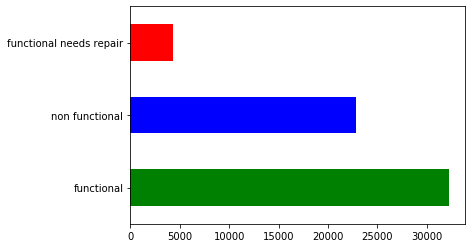

In [326]:
# Let's explore the distribution of the dependent variable. 
my_colors = ['g', 'b', 'r', 'k', 'y', 'm', 'c']  # green, blue, red, black, etc. 
data.status_group.value_counts().plot(kind="barh", color=my_colors)

### Let's explore the water related variables

In [174]:
# Let's check the type of variable
water_variab = ["payment", "payment_type", "water_quality", "quality_group", "quantity", "quantity_group", "source", 
                "source_type", "source_class"]
data[water_variab].dtypes

payment           object
payment_type      object
water_quality     object
quality_group     object
quantity          object
quantity_group    object
source            object
source_type       object
source_class      object
dtype: object

In [327]:
payment_tab = pd.crosstab(index=data["funder"],  # Make a crosstab
                              columns="count")      # Name the count column
payment_tab

col_0,count
funder,
0,777
Aar,33
Abasia,43
Acra,46
Adb,448
Adra,263
African,128
African Development Bank,35
Aict,85


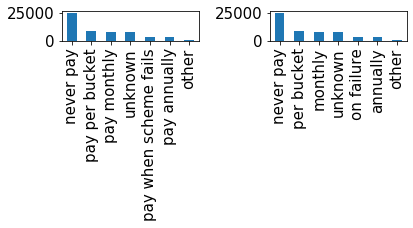

In [376]:
font = {'size': 15}
plt.rc('font', **font)

# Let's plot them
fig, axes = plt.subplots(ncols=2, nrows=1)

# Payment
plt.subplot(221)
data['payment'].value_counts().plot('bar')

# Payment_type
plt.subplot(222)
data['payment_type'].value_counts().plot('bar')

plt.tight_layout()

In [163]:
payment_tab = pd.crosstab(index=data["payment_type"],  # Make a crosstab
                              columns="count")      # Name the count column
payment_tab

col_0,count
payment_type,
annually,3642
monthly,8300
never pay,25348
on failure,3914
other,1054
per bucket,8985
unknown,8157


### Initial pre-processing
- We extract particular data fields from the date variable
- Change string variables to categorical variables